# convolutional neural network

## trained on mnist dataset


https://keras.io/examples/vision/mnist_convnet/

In [5]:
import numpy as np
import keras
from keras import layers
from pprint import pprint
import pandas as pd
from IPython.display import display
from emnist import extract_training_samples, list_datasets, extract_test_samples
import visualkeras
import matplotlib.pyplot as plt

2024-02-23 13:49:44.359465: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 13:49:44.417970: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 13:49:44.418768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-23 13:49:45.247031: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

dataset_descriptions = {
    "byclass": "814,255 characters. 62 unbalanced classes. numbers and letters.",
    "bymerge": "814,255 characters. 47 unbalanced classes. numbers and letters, with similar-looking letters merged.",
    "balanced": "131,600 characters. 47 balanced classes. numbers and letters, balanced across classes.",
    "letters": "145,600 characters. 26 balanced classes. letters, balanced across classes.",
    "digits": "280,000 characters. 10 balanced classes. numbers, balanced across classes.",
    "mnist": "70,000 characters. 10 balanced classes. numbers, directly compatible with the original MNIST dataset."
}

dataset_df = pd.DataFrame.from_dict(dataset_descriptions, orient='index', columns=['Description'])
display(dataset_df)

,Description
byclass,"814,255 characters. 62 unbalanced classes. numbers and letters."
bymerge,"814,255 characters. 47 unbalanced classes. numbers and letters, with similar-looking letters merged."
balanced,"131,600 characters. 47 balanced classes. numbers and letters, balanced across classes."
letters,"145,600 characters. 26 balanced classes. letters, balanced across classes."
digits,"280,000 characters. 10 balanced classes. numbers, balanced across classes."
mnist,"70,000 characters. 10 balanced classes. numbers, directly compatible with the original MNIST dataset."


In [7]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train) = extract_training_samples('digits')
(x_test, y_test) = extract_test_samples('digits')

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (240000, 28, 28, 1)
240000 train samples
40000 test samples


In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Epoch 1/15
1688/1688 [==============================] - 55s 32ms/step - loss: 0.1540 - accuracy: 0.9539 - val_loss: 0.0432 - val_accuracy: 0.9876
Epoch 2/15
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0534 - accuracy: 0.9846 - val_loss: 0.0338 - val_accuracy: 0.9897
Epoch 3/15
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0262 - val_accuracy: 0.9920
Epoch 4/15
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.0246 - val_accuracy: 0.9926
Epoch 5/15
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0337 - accuracy: 0.9902 - val_loss: 0.0229 - val_accuracy: 0.9933
Epoch 6/15
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.0218 - val_accuracy: 0.9934
Epoch 7/15
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0214 -

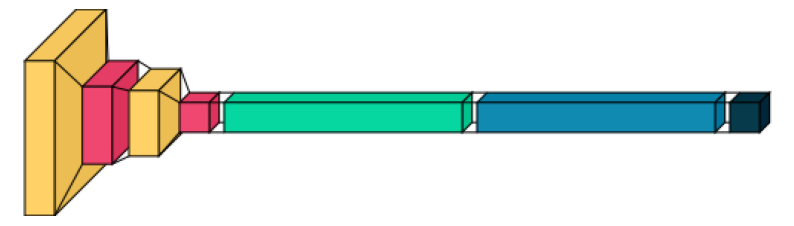

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
pil_img = visualkeras.layered_view(model)

img_array = np.array(pil_img)

plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

import pickle

model.save('../models/mnist_model_digits.h5')


1250/1250 [==============================] - 5s 4ms/step - loss: 0.0169 - accuracy: 0.9958
Test loss: 0.016937384381890297
Test accuracy: 0.9958249926567078


/home/lokman/anaconda3/envs/gemma/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
model = keras.models.load_model('../models/mnist_model_digits.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0